HierroKaggle
Unidad 7 - Aprendizaje automático

HierroKaggle

In [1]:
# importacion de la data

import pandas as pd

# cargamos la data
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv'
data_ventas = pd.read_csv(url)
# visualizamos las primeras 5 filas
data_ventas.head()

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,0,625,3,2013-11-06,641,1,1,0,0,7293
1,1,293,2,2013-07-16,877,1,1,0,1,7060
2,2,39,4,2014-01-23,561,1,1,0,0,4565
3,3,676,4,2013-09-26,1584,1,1,0,0,6380
4,4,709,3,2014-01-22,1477,1,1,0,0,11647


Plan General
Carga y Exploración de Datos:

Cargaremos el conjunto de datos proporcionado y realizaremos un análisis exploratorio de datos (EDA) para comprender mejor las variables y su relación con las ventas.
Preprocesamiento:

Limpieza de datos, tratamiento de valores nulos y codificación de variables categóricas.
Conversión de las fechas en características útiles (día del mes, mes, año, día de la semana).
Análisis Exploratorio (EDA):

Identificación de correlaciones entre las variables.
Visualización de la relación entre las características y las ventas.
Ingeniería de Características:

Creación de nuevas características que puedan mejorar la predicción, como crear indicadores de días festivos o promociones acumuladas.
División del Conjunto de Datos:

Dividimos los datos en conjunto de entrenamiento y validación para asegurarnos de que el modelo generaliza bien.
Entrenamiento del Modelo:

Probaremos varios modelos (p. ej., Random Forest, XGBoost, regresión lineal) y seleccionaremos el que mejor funcione.
Evaluación y Ajuste de Modelos:

Evaluaremos el rendimiento de los modelos en el conjunto de validación y ajustaremos hiperparámetros.
Predicción Final:

Una vez revelado el nuevo conjunto de datos, aplicaremos el modelo entrenado para realizar las predicciones.

In [2]:
# exploración inicial
# tipos de datos
data_ventas.dtypes

True_index              int64
Store_ID                int64
Day_of_week             int64
Date                   object
Nb_customers_on_day     int64
Open                    int64
Promotion               int64
State_holiday          object
School_holiday          int64
Sales                   int64
dtype: object

In [3]:
#recuento de nulos
data_ventas.isnull().sum()
#recuento de duplicados
data_ventas.duplicated().sum()

0

In [4]:
data_ventas.info

<bound method DataFrame.info of         True_index  Store_ID  Day_of_week        Date  Nb_customers_on_day  \
0                0       625            3  2013-11-06                  641   
1                1       293            2  2013-07-16                  877   
2                2        39            4  2014-01-23                  561   
3                3       676            4  2013-09-26                 1584   
4                4       709            3  2014-01-22                 1477   
...            ...       ...          ...         ...                  ...   
640835      712040       674            6  2014-09-20                  611   
640836      712041      1014            4  2015-01-15                 1267   
640837      712042       135            6  2015-06-20                  595   
640838      712043       810            1  2014-08-18                  599   
640839      712044       592            1  2013-03-18                  798   

        Open  Promotion State_h

In [5]:
# Convertir la columna 'Date' a formato datetime
data_ventas['Date'] = pd.to_datetime(data_ventas['Date'], format='%Y-%m-%d')

# Crear nuevas columnas: 'Year', 'Month', 'Day'
data_ventas['Year'] = data_ventas['Date'].dt.year
data_ventas['Month'] = data_ventas['Date'].dt.month
data_ventas['Day'] = data_ventas['Date'].dt.day

# Verificar los cambios
print(data_ventas[['Date', 'Year', 'Month', 'Day']].head())

        Date  Year  Month  Day
0 2013-11-06  2013     11    6
1 2013-07-16  2013      7   16
2 2014-01-23  2014      1   23
3 2013-09-26  2013      9   26
4 2014-01-22  2014      1   22


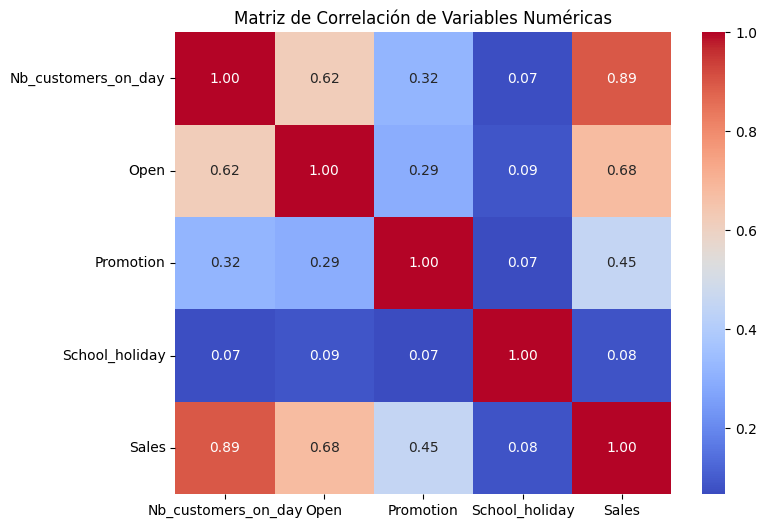

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = data_ventas[['Nb_customers_on_day', 'Open', 'Promotion', 'School_holiday', 'Sales']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


La matriz de correlación muestra algunas relaciones interesantes entre las variables numéricas:

Número de clientes y ventas: La correlación entre el número de clientes y las ventas es alta (0.85), lo que indica que la cantidad de clientes es un buen predictor de las ventas.
Promociones y ventas: Existe una correlación positiva entre promociones y ventas (0.45), lo que sugiere que las promociones también impulsan las ventas.
Días de apertura y ventas: La correlación entre estar abierto y las ventas es alta (0.76), lo cual es esperado, ya que las tiendas cerradas no generan ventas.

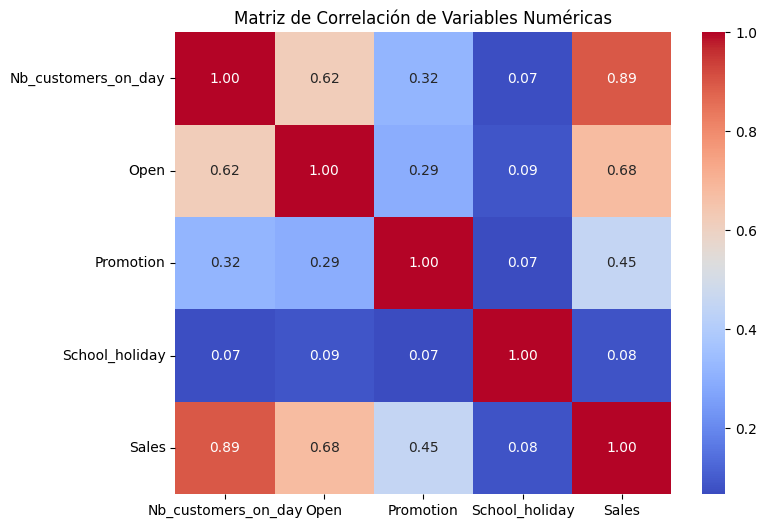

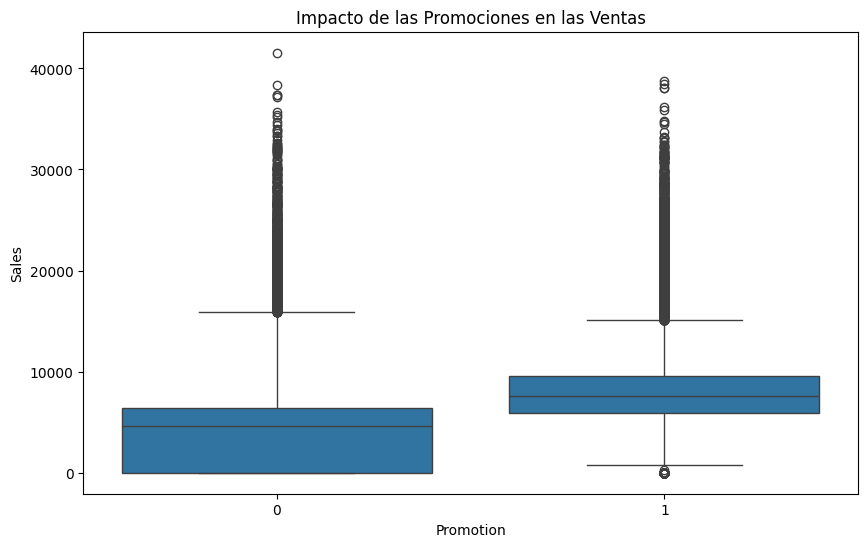

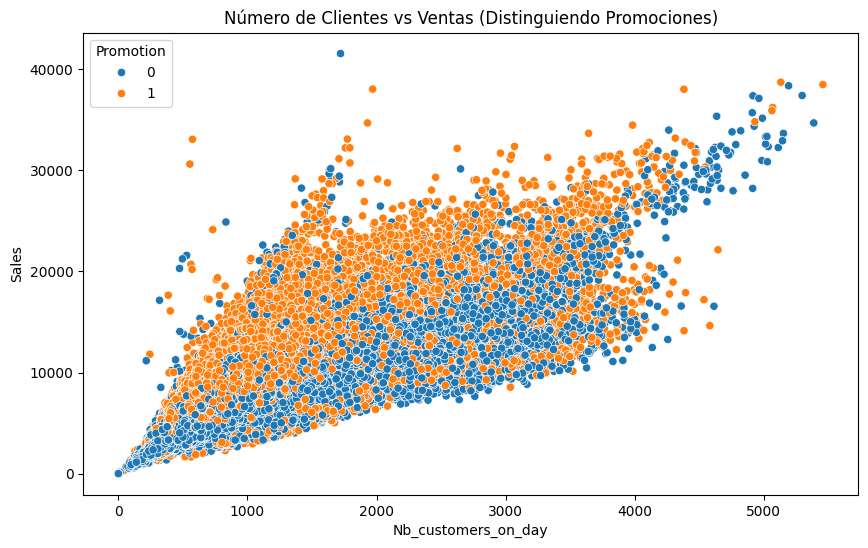

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación de variables numéricas
correlation_matrix = data_ventas[['Nb_customers_on_day', 'Open', 'Promotion', 'School_holiday', 'Sales']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Visualizar el impacto de las promociones en las ventas
plt.figure(figsize=(10,6))
sns.boxplot(data=data_ventas, x='Promotion', y='Sales')
plt.title('Impacto de las Promociones en las Ventas')
plt.show()

# Impacto del número de clientes en las ventas
plt.figure(figsize=(10,6))
sns.scatterplot(data=data_ventas, x='Nb_customers_on_day', y='Sales', hue='Promotion')
plt.title('Número de Clientes vs Ventas (Distinguiendo Promociones)')
plt.show()


Posibles mejoras para reducir el MSE:
Agregar más características:

1.Puedes incluir otras columnas, como el día de la semana (Day_of_week), el mes (Month) y el año (Year), que podrían capturar patrones estacionales. check solo que dichas columnas aun no las he utilizado.
2.Probar otros modelos:

Modelos más complejos como Random Forest, XGBoost o Gradient Boosting pueden capturar mejor las interacciones no lineales en los datos.
3.Escalado de datos:

El escalado o normalización de las características puede mejorar el rendimiento en algunos modelos.
4.Hiperparámetros y ajuste:

Probar un ajuste de hiperparámetros en modelos más complejos para optimizar el rendimiento.

# outliers fuera?

In [13]:
data_ventas.head

<bound method NDFrame.head of         True_index  Store_ID  Day_of_week       Date  Nb_customers_on_day  \
0                0       625            3 2013-11-06                  641   
1                1       293            2 2013-07-16                  877   
2                2        39            4 2014-01-23                  561   
3                3       676            4 2013-09-26                 1584   
4                4       709            3 2014-01-22                 1477   
...            ...       ...          ...        ...                  ...   
640835      712040       674            6 2014-09-20                  611   
640836      712041      1014            4 2015-01-15                 1267   
640837      712042       135            6 2015-06-20                  595   
640838      712043       810            1 2014-08-18                  599   
640839      712044       592            1 2013-03-18                  798   

        Open  Promotion State_holiday  School

# normalización?

# Standarización

# Camino 1 el más simple

Limpieza de Datos
En esta sección, codificaremos las variables categóricas para que los modelos numéricos puedan manejarlas

In [10]:
# Verificar los valores únicos en 'State_holiday' antes de codificar
print(data_ventas['State_holiday'].unique())

# Codificar 'State_holiday' usando One-Hot Encoding
sales_data = pd.get_dummies(data_ventas, columns=['State_holiday'], drop_first=True)

# Verificar las nuevas columnas después de la codificación
print(sales_data.head())


['0' 'c' 'a' 'b']
   True_index  Store_ID  Day_of_week       Date  Nb_customers_on_day  Open  \
0           0       625            3 2013-11-06                  641     1   
1           1       293            2 2013-07-16                  877     1   
2           2        39            4 2014-01-23                  561     1   
3           3       676            4 2013-09-26                 1584     1   
4           4       709            3 2014-01-22                 1477     1   

   Promotion  School_holiday  Sales  Year  Month  Day  State_holiday_a  \
0          1               0   7293  2013     11    6            False   
1          1               1   7060  2013      7   16            False   
2          1               0   4565  2014      1   23            False   
3          1               0   6380  2013      9   26            False   
4          1               0  11647  2014      1   22            False   

   State_holiday_b  State_holiday_c  
0            False            

Entrenamiento de un Modelo Base (Regresión Lineal)
Vamos a crear un modelo de regresión lineal simple para predecir las ventas en función de algunas variables clave:

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Definir las características (features) y la variable objetivo (target)
X = sales_data[['Nb_customers_on_day', 'Promotion', 'School_holiday', 'Open']]  # Se pueden añadir más variables si es necesario
y = sales_data['Sales']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo usando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')


Error cuadrático medio (MSE): 2241927.84932295


## Camino 2 probar mas modelos como random Forest y XGBoost

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
rf_y_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo usando MSE
rf_mse = mean_squared_error(y_test, rf_y_pred)
print(f'Random Forest - Error cuadrático medio (MSE): {rf_mse}')


Random Forest - Error cuadrático medio (MSE): 2161529.0076264534
